In [ ]:
import src.models

import orbax.checkpoint
from src.training import utils

orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

x0 = [0.1, 0.1]
y = [1.5, 0.5]
T = 2.0

checkpoint_path_b = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/fixed_y_{y}_T_{T}"
restored_b = orbax_checkpointer.restore(checkpoint_path_b)
model_b = src.models.score_mlp.ScoreMLP(**restored_b["network"])
params_b = restored_b["params"]
trained_score = utils.trained_score(model_b, params_b)
sde_b = restored_b["sde"]

In [ ]:
checkpoint_path_forward = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/forward/fixed_x0_{x0}"

restored_f = orbax_checkpointer.restore(checkpoint_path_forward)
model_f = src.models.score_mlp.ScoreMLP(**restored_f["network"])
params_f = restored_f["params"]
trained_score_forward= utils.trained_score(model_f, params_f)

In [ ]:
from src.data_generate_sde import utils as sde_utils
from src.data_generate_sde import sde_cell_model, time
import functools
import jax
import matplotlib.pyplot as plt

ts = time.grid(0, T, 400)

drift, diffusion = sde_cell_model.vector_fields()
bw_fn = functools.partial(sde_utils.backward, ts=ts, y=y, score_fn=trained_score_forward, drift=drift, diffusion=diffusion)

keys = jax.random.split(jax.random.PRNGKey(0), 100)

conditioned_trajs = jax.vmap(bw_fn)(keys)

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 0])
plt.show()

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 1])
plt.show()

In [ ]:
from src.plotting import plot_score_2d

plot_score_2d(learned_score=trained_score_forward)

In [ ]:
from src.data_generate_sde import utils as sde_utils
from src.data_generate_sde import sde_cell_model, time
import functools
import jax
import matplotlib.pyplot as plt

ts = time.grid(0, T, 400)
x0= [0.1, 0.1]


drift, diffusion = sde_cell_model.vector_fields()
conditioned_fn = functools.partial(sde_utils.conditioned, ts=ts, x0=x0, score_fn=trained_score, drift=drift, diffusion=diffusion)

keys = jax.random.split(jax.random.PRNGKey(0), 100)

conditioned_trajs = jax.vmap(conditioned_fn)(keys)

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 0])
plt.show()

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 1])
plt.show()

In [ ]:
from src.plotting import plot_score_2d

plot_score_2d(learned_score=trained_score)

In [3]:
import src.models

import orbax.checkpoint
from src.training import utils
from src.data_generate_sde import time

orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

x0 = [0.1, 0.1]
y = [2.0, 0.3]
T = 2.0
ts = time.grid(0, T, 400)


checkpoint_path_23 = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/fixed_y_{y}_T_{T}"
restored_23 = orbax_checkpointer.restore(checkpoint_path_23)
model_23 = src.models.score_mlp.ScoreMLP(**restored_23["network"])
params_23 = restored_23["params"]
trained_score_23 = utils.trained_score(model_23, params_23)
sde_23 = restored_23["sde"]
print(sde_23)

{'N': 100, 'T': 2.0, 'dim': 2, 'x0': [0.1, 0.1], 'y': [2.0, 0.3]}


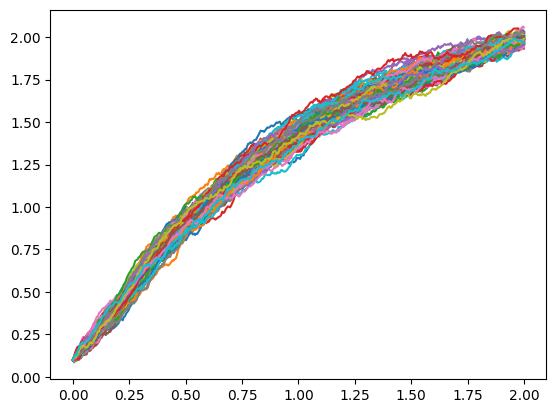

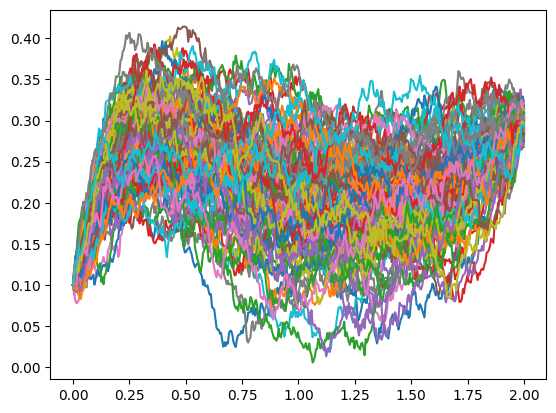

In [4]:
from src.data_generate_sde import utils as sde_utils
from src.data_generate_sde import sde_cell_model, time
import functools
import jax
import matplotlib.pyplot as plt

drift, diffusion = sde_cell_model.vector_fields()
conditioned_fn = functools.partial(sde_utils.conditioned, ts=ts, x0=x0, score_fn=trained_score_23, drift=drift, diffusion=diffusion)

keys = jax.random.split(jax.random.PRNGKey(0), 100)

conditioned_trajs = jax.vmap(conditioned_fn)(keys)

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 0])
plt.show()

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 1])
plt.show()

In [ ]:
import src.models

import orbax.checkpoint
from src.training import utils
from src.data_generate_sde import time

orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

x0 = [0.1, 0.1]
y = [2.0, 0.3]
T = 4.0
ts = time.grid(0, T, 400)


checkpoint_path_T4 = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/fixed_y_{y}_T_{T}"
restored_T4 = orbax_checkpointer.restore(checkpoint_path_T4)
model_T4 = src.models.score_mlp.ScoreMLP(**restored_T4["network"])
params_T4 = restored_T4["params"]
trained_score_T4 = utils.trained_score(model_T4, params_T4)
sde_T4 = restored_T4["sde"]
print(sde_T4)

In [ ]:
from src.data_generate_sde import utils as sde_utils
from src.data_generate_sde import sde_cell_model, time
import functools
import jax
import matplotlib.pyplot as plt

drift, diffusion = sde_cell_model.vector_fields()
conditioned_fn = functools.partial(sde_utils.conditioned, ts=ts, x0=x0, score_fn=trained_score_T4, drift=drift, diffusion=diffusion)

keys = jax.random.split(jax.random.PRNGKey(0), 100)

conditioned_trajs = jax.vmap(conditioned_fn)(keys)

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 0])
plt.show()

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 1])
plt.show()

In [1]:
import src.models

import orbax.checkpoint
from src.training import utils
from src.data_generate_sde import time

orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

x0 = [0.1, 0.1]
y = [2.0, 0.3]
T = 30.0
ts = time.grid(0, T, 400)


# checkpoint_path_guided = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/fixed_x0_{x0}_y_{y}"

checkpoint_path_guided = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/cell/fixed_y_{y}_T_{T}_forward_data"

restored_guided = orbax_checkpointer.restore(checkpoint_path_guided)
model_guided = src.models.score_mlp.ScoreMLP(**restored_guided["network"])
params_guided = restored_guided["params"]
trained_score_guided = utils.trained_score(model_guided, params_guided)
sde_guided = restored_guided["sde"]
print(sde_guided)

{'N': 100, 'T': 30.0, 'dim': 2, 'x0': [0.1, 0.1], 'y': [2.0, 0.3]}


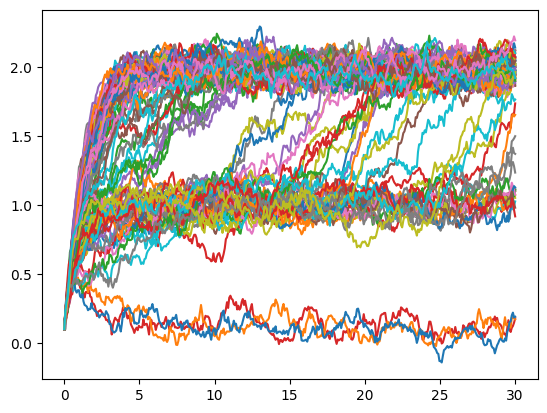

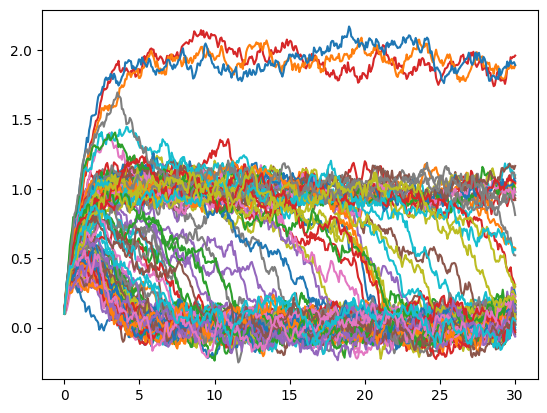

In [2]:
from src.data_generate_sde import utils as sde_utils
from src.data_generate_sde import sde_cell_model, time
import functools
import jax
import matplotlib.pyplot as plt

drift, diffusion = sde_cell_model.vector_fields()
conditioned_fn = functools.partial(sde_utils.conditioned, ts=ts, x0=x0, score_fn=trained_score_guided, drift=drift, diffusion=diffusion)

keys = jax.random.split(jax.random.PRNGKey(0), 100)

conditioned_trajs = jax.vmap(conditioned_fn)(keys)

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 0])
plt.show()

for traj in conditioned_trajs:
    plt.plot(ts, traj[:, 1])
plt.show()